<a href="https://colab.research.google.com/github/Chrstphr1995/BDA_Project/blob/Version-3/Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2 Die Aktienverläufe

>2.1 Das richtige Setup

>2.2 Generierung der gewünschten Aktienkurse

>2.3 Die Kursverläufe im Überblick

>2.4 Exkurs: Der .csv/.xslx Export für alle Interessierten

>2.5 Microsoft - Eine genaue Betrachtung

>2.6 Der "Simple-Moving-Average"

>2.7 Relative String Index

>2.8 Stock Market Predictions



---



#2.1 Das richtige Setup

Als erstes bereiten wir das Setup für unsere Analyse vor.

Zunächst wird ein Package von Alpha Vantage installiert. Auf [Alpha Vantage](https://www.alphavantage.co/) lässt sich ein individueller API Key generieren. Durch diesen erhalten wir kostenlos Zugang zu historischen Kursdaten in Echzeit.

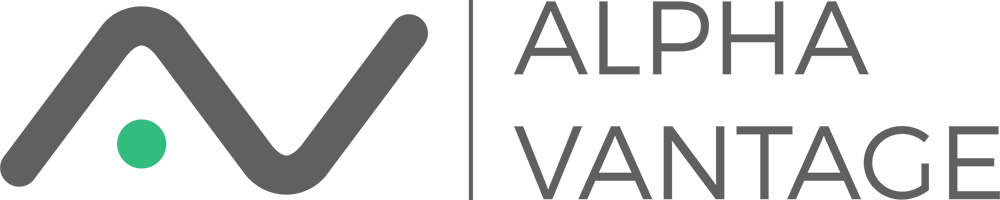


Die Anteilung für den Code stammt von [Youtube](https://www.youtube.com/watch?v=d2kXmWzfS0w). Dieser kann nicht 1:1 übernommen werden, sondern muss an manchen stellen angepasst werden.


In [ ]:
pip install alpha_vantage

In [5]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time


Der generierte API Key von Alpha Vantage wird eingefügt.

In [6]:
api_key = "NMO1Y2U90QAJBJ2V"



---



#2.2 Generierung der gewünschten Aktienkurse

...

Nun wird damit begonnen, die historischen Kursdaten zu generieren. An dieser Stelle wird der Code aus dem Youtube Video abgeändert. Ursprünglicher Code:

**ts = TimeSeries(key=api_key, output_format='pandas')**

--> Dieser Teil bleibt gleich. Es wird anhand des API_Keys auf die historischen Kurse zugegriffen.

--

**data_ts, meta_data_ts = ts.get_intraday(symbol='MSFT', interval='1min', outputsize='full')**

--> Im Youtube Video werden minutengenaue Kurse von Alpha Vantage importiert. Dementsprechend lautet die Funktion ts.get_intraday(...). 

--> Für unser Beispiel reicht der tagesaktuelle Schlusskurs der Aktien. Die Funktion wird umgeändert in ts.get_daily(...).

--> Mit dem Symbol ("MSFT") wird angegeben welche Kurse importiert werden sollen. In diesem fall sind es die Kurse der Microsoft Aktie. Das Symbol kann beliebig geändert werden (bspw. AAPL = Apple).

--> Outputsize gibt den zeitlichen Rahmen des Outputs an. In unserem Beispiel werden die Kurse seit dem Initial Public Offering der jeweiligen Aktie angezeigt.

In [7]:
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full') 
                                     

In [8]:
ta = TimeSeries(key=api_key, output_format='pandas')
data_ta, meta_data_ta = ta.get_daily(symbol='AAPL', outputsize='full') 

In [9]:
te = TimeSeries(key=api_key, output_format='pandas')
data_te, meta_data_te = te.get_daily(symbol='GOOGL', outputsize='full')



---



Nachdem die Kurse der gewünschten Aktien importiert wurden, müssen diese in eine verwertbare Form gebracht werden.

Mit **df1 = data_ts; df2 = data_ta; df3 = data te** wird die obige Funktion vereinfacht. Mit **total_df = pd.concat([df1, df2, df3], axis=1)** werden die drei Aktienkurse zusammengefasst. Damit können sie mit **print(total_df)** in einer Tabelle abgebildet werden.

Ursprünglich würden die Werte der Tabelle "1. Open"; "2. High"; "3. Low"; "4. Close"; "5. Volume" beinhalten. Durch den Zusatz **['4. close']** wird der Output pro Aktie jedoch auf den Schlusskurs begrenzt. Dadurch wird die ausgegebene Tabelle übersichtlicher. Mit dem Zusatz ['5. Volume'] könnten bspw. die Handelsvolumen des jeweiligen Tages pro Aktie abgebildet werden.


In [18]:
#Microsoft
df1 = data_ts['4. close']

In [19]:
#Apple
df2 = data_ta['4. close']

In [20]:
#Alphabet
df3 = data_te['4. close']

In [21]:
total_df1 = pd.concat([df1, df2, df3], axis=1)

In [22]:
print(total_df1)

            4. close  4. close  4. close
date                                    
1999-11-01     92.37     77.62       NaN
1999-11-02     92.56     80.25       NaN
1999-11-03     92.00     81.50       NaN
1999-11-04     91.75     83.62       NaN
1999-11-05     91.56     88.31       NaN
...              ...       ...       ...
2020-12-30    221.68    133.72   1736.25
2020-12-31    222.42    132.69   1752.64
2021-01-04    217.69    129.41   1726.13
2021-01-05    217.90    131.01   1740.05
2021-01-06    212.25    126.60   1722.88

[5330 rows x 3 columns]




---



#2.3 Die Kursverläufe im Überblick

Das sind die Kursverläufe unserer ausgewählten Aktien im Überblick

Mit **matplotlib.pyplot** werden die obenstehenden Daten in einer Grafik visualisiert. Durch die Zusammenfassung der einzelnen Funktionen df1, df2 und df3 zu total_df werden die Schlusskurse aller drei Aktien abgebildet.

Besonderheit: Sowohl bei Apple, als auch bei Alphabet ist 2014 und im August 2020 ein starker Einbruch zu verzeichnen. Der Aktienkurs an sich ist jedoch nicht eingebrochen. Zu diesen Zeitpunkten wurde ein Aktiensplit durchgeführt. Wer beispielsweise am 31.07.2020 eine Apple Aktie im Wert von 400 Dollar besessen hat, hatte am 01.08.2020 vier Aktien im Wert von je 100 Dollar in seinem Portfolio. Dementsprechend sank der Schlusskurs von 400 Dollar auf 100 Dollar, ohne dass sich für die Aktionäre Einbußen auftaten.

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams

total_df1.plot()
plt.title("Microsoft vs Apple vs Alphabet")
plt.xlabel("date")
plt.ylabel("US Dollar")
plt.legend(["Microsoft", "Apple", "Alphabet"])
rcParams['figure.figsize'] = 20, 10
plt.show()



---



#2.4 Exkurs: Der .csv/.xslx Export für alle Interessierten

Wer Interesse hat und mit den Daten außerhalb von Python weiterarbeiten möchte, kann sich mit folgendem Code eine Date exportieren lassen. Im Beispiel wird durch **df.to_csv('MAG_Close.csv')** eine CSV Datei generiert. Diese kann direkt aus Google Colab gedownloadet und lokal weiterbearbeitet werden. Wird der Code umgeschrieben (**df.to_excel('MAG_Close.xlsx'**), wird eine Excel-Datei generiert. Wer nicht mit Python arbeiten möchte, kann die Daten nun mit Programmen wie Tableau ([free for students](https://www.tableau.com/de-de/academic/students)) oder Microsoft Power BI (nicht für MacOS User) weiter bearbeiten und visualisieren.

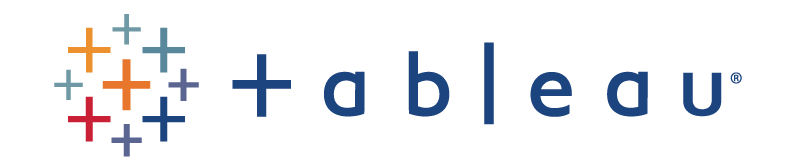

Source for Code: https://www.geeksforgeeks.org/python-save-list-to-csv/

In [ ]:
import pandas as pd
df = pd.DataFrame(total_df1)
df.to_csv('MSFT_AAPL_GOOGL_Close.csv')



---



#2.5 Microsoft - Eine genaue Betrachtung

Da die Kurse von Microsoft, Apple und Alphabet sehr eng miteinander korrelieren (Ausnahme Aktiensplit), wird folgend mit Microsoft als Referenzaktie weitergearbeitet. Dadurch werden die grafischen Darstellungen ebenfalls vereinfacht, weil sich nicht mehr verschiedene Kursdaten innerhalb einer Grafik befinden.

Das Vorgehen für die Generierung der Schlusskurse ist identisch zu *1.1 Generierung und Abbildung der Aktienkurse*

In [23]:
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full')

In [24]:
df1 = data_ts['4. close']

Im Vergleich zu *1.1 Generierung und Abbildung der Aktienkurse* wird hier anstelle von total_df = pd.concat([df1, df2, df3], axis=1) nur **total_df = pd.concat([df1], axis=1)** benutzt, da nur eine Aktie betrachtet wird.

In [25]:
total_df = pd.concat([df1], axis=1)

In [26]:
print(total_df)

            4. close
date                
2021-01-06    212.25
2021-01-05    217.90
2021-01-04    217.69
2020-12-31    222.42
2020-12-30    221.68
...              ...
1999-11-05     91.56
1999-11-04     91.75
1999-11-03     92.00
1999-11-02     92.56
1999-11-01     92.37

[5330 rows x 1 columns]


In [ ]:
import pandas as pd

df = pd.DataFrame(df1)

df.to_csv('Microsoft_Close.csv')

In [27]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

- Entwicklung der Microsoft Aktie über die Jahre
- Nur am Aktiekurs allein lässt sich keine Auffälligkeit ableiten
- Deswegen ergänzen wir die Grafik um den Simple Moving Average

In [ ]:
df = pd.read_csv('/content/Microsoft_Close.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['4. close'])])

fig.update_layout(title='Stock Prices of Microsoft till today')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()



---



#2.6 Der "Simple-Moving-Average"

...

In [28]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

In [29]:
api_key = "NMO1Y2U90QAJBJ2V"

In [30]:
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full')

In [31]:
ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_sma(symbol='MSFT', series_type='close')

In [32]:
df1 = data_ts['4. close']
df2 = data_ti.iloc[1000::]
total_df = pd.concat([df1, df2], axis=1)

In [33]:
print(total_df)

            4. close       SMA
date                          
1999-11-01     92.37       NaN
1999-11-02     92.56       NaN
1999-11-03     92.00       NaN
1999-11-04     91.75       NaN
1999-11-05     91.56       NaN
...              ...       ...
2020-12-30    221.68  217.8280
2020-12-31    222.42  218.1805
2021-01-04    217.69  218.3530
2021-01-05    217.90  218.5300
2021-01-06    212.25  218.4280

[5330 rows x 2 columns]


In [34]:
import pandas as pd
df = pd.DataFrame(total_df)
df.to_csv('Microsoft_CloseSMA.csv')

In [35]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go

In [ ]:
df = pd.read_csv('/content/Microsoft_CloseSMA.csv')

In [ ]:
fig = go.Figure()

In [ ]:
# Add Traces
# https://plotly.com/python/custom-buttons/

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['SMA'],
               name="Simple Moving Average",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['4. close'],
               name='Schlusskurs',
               line=dict(color="#F06A6A")))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Set title
fig.update_layout(
    title_text="Schlusskurs vs. Simple Moving Average",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

- Gibt es zum Zeitpunkt des Leaks Abweichungen vom Durchschnitt?
- Nein gibt es nicht - Anscheinend lohnt sich Finanzbetrug

- Finanzbetrug hat keinerlei Auswirkungen auf die Entwicklung der Aktienkurse
- ANDERERSEITS: Viel plumpere Aktionen haben für einen Einsturz an der Börse gesogt (Elon Musks Tweet über Twitter und Kylie Jenner und Snapchat)

In [ ]:
#import matplotlib.pyplot as plt
#from pylab import rcParams

#total_df.plot()
#plt.title("Closing Price vs Simple Moving Average at Microsoft")
#plt.xlabel("date")
#plt.ylabel("US Dollar")
#plt.legend(["Schlusskurs", "Simple Moving Average"])
#rcParams['figure.figsize'] = 10, 20
#plt.show()



---



#2.7 Relative String Index

https://www.youtube.com/watch?v=cY9o3yCG9Mo

RSI genauer erklären und die Formel herzeigen.

Der RSI (deutsch: relativer Stärke Index) zeigt Ihnen, ob eine Aktie in einem festgelegten Beobachtungszeitraum überkauft oder überverkauft ist.

Es handelt sich dabei um einen Preisfolgeindikator, dessen Wert stets zwischen 

*   Es handelt sich dabei um einen Preisfolgeindikator, dessen Wert stets zwischen 100 und 0 liegt.
*   Für die Ermittlung des RSI werden die Kursschwankungen eines Basiswerts über die Zeit in Relation gesetzt.


*   Liegt der Wert über 70, ist die Aktie höchstwahrscheinlich überkauft. Das bedeutet, dass verhältnismäßig viele Käufe vorliegen, die den Kurs nach oben treiben. Dies macht einen baldigen Einbruch des Kurses wahrscheinlich.
*   Ab einem RSI von 30 wird von einem überverkauften Basiswert gesprochen. Hier ist es dann in den vergangenen Tagen zu überproportional vielen Verkäufen gekommen, die den Aktienkurs schnell absinken lassen.

*   Der RSI kann Ihnen bei Investitionsentscheidungen als wirkungsvolles Warnsignal dienen. In Extremsituationen können die Ergebnisse allerdings verfälscht werden. Ziehen Sie daher für Ihre Trading Aktivitäten auch immer weitere Parameter zur Beurteilung heran.

In [36]:
tb = TimeSeries(key=api_key, output_format='pandas')
data_tb, meta_data_tb = ti.get_rsi(symbol='MSFT', series_type='close')

In [37]:
df10 = data_tb

In [38]:
total_df3 = pd.concat([df10], axis=1)

In [39]:
print(total_df3)

                RSI
date               
1999-11-30  47.1204
1999-12-01  51.8525
1999-12-02  55.0573
1999-12-03  57.4671
1999-12-06  55.8313
...             ...
2020-12-30  56.0159
2020-12-31  56.7940
2021-01-04  50.7528
2021-01-05  50.9964
2021-01-06  44.7302

[5310 rows x 1 columns]


In [ ]:
import pandas as pd
df = pd.DataFrame(total_df3)
df.to_csv('MSFT_3.csv')

In [ ]:
df = pd.read_csv('/content/MSFT_3.csv')

In [ ]:
fig = go.Figure()

In [ ]:
df = pd.read_csv('/content/MSFT_3.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['RSI'])])

fig.update_layout(title='Relative String Index')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Im April 2016 wurden die Paper geleakt. In diesem Zeitraum bricht der RSI für Microsoft ein (knapp über 30). Das bedeutet, dass viele Leute in den Tagen davor Ihre Aktien verkauft haben. 
https://www.finanzen100.de/finanznachrichten/wirtschaft/konzerne-im-fadenkreuz-fuenf-gruende-warum-sich-aktienbesitzer-wegen-der-panama-papers-nicht-sorgen-muessen_H1743650401_260038/

Aktie von Microsoft um ca 10 Prozent abgestürzt, nachdem die Paper geleakt wurden



---



#2.8 Stock Market Prediction

...

In [40]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [42]:
# Auf die Kursdaten von Microsoft wird via Alpha Vantage zugegriffen
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full')

In [43]:
print(data_ts)

            1. open   2. high  3. low  4. close   5. volume
date                                                       
2021-01-06   212.17  216.4899  211.94    212.25  33700498.0
2021-01-05   217.26  218.5200  215.70    217.90  23822953.0
2021-01-04   222.53  223.0000  214.81    217.69  37130139.0
2020-12-31   221.70  223.0000  219.68    222.42  20942132.0
2020-12-30   225.23  225.6300  221.47    221.68  20272337.0
...             ...       ...     ...       ...         ...
1999-11-05    91.81   92.8700   90.50     91.56  35083700.0
1999-11-04    92.31   92.7500   90.31     91.75  27119700.0
1999-11-03    92.94   93.5000   91.50     92.00  22258500.0
1999-11-02    92.75   94.5000   91.94     92.56  23174500.0
1999-11-01    93.25   94.1900   92.12     92.37  26630600.0

[5330 rows x 5 columns]


In [44]:
df5 = data_ts['4. close']

In [45]:
print(df5)

date
2021-01-06    212.25
2021-01-05    217.90
2021-01-04    217.69
2020-12-31    222.42
2020-12-30    221.68
               ...  
1999-11-05     91.56
1999-11-04     91.75
1999-11-03     92.00
1999-11-02     92.56
1999-11-01     92.37
Name: 4. close, Length: 5330, dtype: float64


In [145]:
# A variable for predicting 'n' days out into the future
forecast_out = 1

In [158]:
df6[['Prediction']] = data_ts[['4. close']].shift(forecast_out)

In [159]:
total_df4 = pd.concat([df5, df6[['Prediction']]], axis=1)

In [161]:
# Am 05.01.2021 hatten wir eine prediction von 212,25, welche wir am 06.01.2021 erreicht haben
print(total_df4.head())

            4. close  Prediction
date                            
2021-01-06    212.25         NaN
2021-01-05    217.90      212.25
2021-01-04    217.69      217.90
2020-12-31    222.42      217.69
2020-12-30    221.68      222.42


In [176]:
### Create the independent data set (X)
# Convert the dataframe to a numpy array

X = np.array(total_df4.drop(['Prediction'],1))

# Remove the last 'n' rows
X = X[forecast_out:]

In [177]:
print(X)

[[217.9 ]
 [217.69]
 [222.42]
 ...
 [ 92.  ]
 [ 92.56]
 [ 92.37]]


In [164]:
### Create the dependent data set (y)
# Convert the data frame to a numpy array (all of the values including the NaN's)
y = np.array(total_df4['Prediction'])

#Get all of the y values except the last 'n' rows
y=y[forecast_out:]

print(y)

[212.25 217.9  217.69 ...  91.75  92.    92.56]


In [165]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [166]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [167]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print('svm_confidence: ', svm_confidence)

svm_confidence:  0.9986122804867293


In [168]:
# Create and train the linear regression model
lr = LinearRegression()

# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print('lr_confidence: ', lr_confidence)

lr_confidence:  0.9986466098525949


In [170]:
# Set x_forecast equal to the last 'n' rows of the original data set from '4. close' column
x_forecast = np.array(total_df4.drop(['Prediction'],1))[:forecast_out]

In [171]:
print(x_forecast)

[[212.25]]


In [172]:
# Print the linear regression for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[212.1674285]


In [173]:
# Print the vector regressor model for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[210.3139541]


#Aktienkurs von Facebook - Evtl oben noch ergänzen

In [169]:
#ts = TimeSeries(key=api_key, output_format='pandas')
#data, meta_data = ts.get_daily(symbol='FB', outputsize = 'full')

In [ ]:
#print(data)

In [171]:
#df13 = data_ts['4. close']

In [ ]:
#print(df13)

In [176]:
#import pandas as pd
#df = pd.DataFrame(df13)
#df.to_csv('FB.csv')

In [ ]:
#df = pd.read_csv('/content/MSFT_3.csv')

In [177]:
#fig = go.Figure()

In [ ]:
#df = pd.read_csv('/content/FB.csv')

#fig = go.Figure([go.Scatter(x=df['date'], y=df['4. close'])])

#fig.update_layout(title='Facebook Closing Price')

#fig.update_xaxes(
#    rangeslider_visible=True,
#    rangeselector=dict(
#        buttons=list([
#            dict(count=1, label="1m", step="month", stepmode="backward"),
#            dict(count=6, label="6m", step="month", stepmode="backward"),
#            dict(count=1, label="YTD", step="year", stepmode="todate"),
#            dict(count=1, label="1y", step="year", stepmode="backward"),
#            dict(step="all")
#        ])
#    )
#)
#fig.show()